In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
 #Load dataset
regression_data_path = '/content/drive/MyDrive/AI/combined_final_last_10_years.csv'
regression_df = pd.read_csv(regression_data_path)


In [44]:
# 1. Exploratory Data Analysis and Data Understanding
print("Regression Dataset Overview")
print(regression_df.info())  # Dataset structure and missing values
print(regression_df.describe())  # Summary statistics


Regression Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   continent          1234 non-null   object 
 1   country            1234 non-null   object 
 2   year               1234 non-null   int64  
 3   demox_eiu          1234 non-null   float64
 4   income_per_person  1234 non-null   int64  
 5   invest_%_gdp       1234 non-null   float64
 6   tax_%_gdp          1234 non-null   float64
 7   gini_index         1234 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 77.3+ KB
None
              year    demox_eiu  income_per_person  invest_%_gdp    tax_%_gdp  \
count  1234.000000  1234.000000        1234.000000   1234.000000  1234.000000   
mean   2010.913290    62.083306       20520.390600     24.386224    16.768777   
std       3.083815    20.569704       19421.169132      7.957001     7.6258

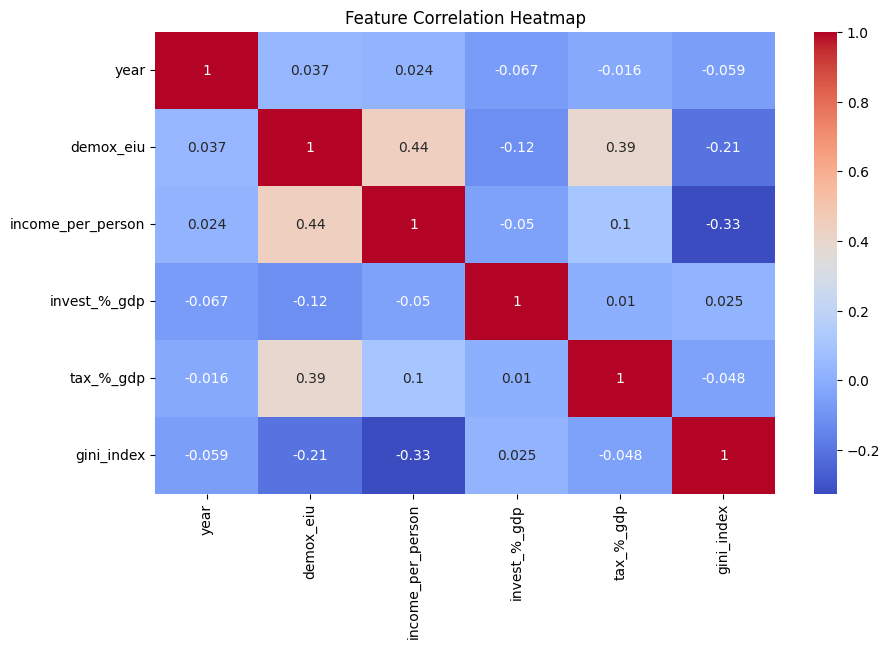

In [45]:
# Visualizing correlation heatmap
plt.figure(figsize=(10,6))
numerical_features = regression_df.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [47]:
# 2. Data Preprocessing
# Check if 'Gini Index' or 'gini index' is in the columns (case-insensitive)
actual_columns = regression_df.columns.tolist()
column_name = next((col for col in actual_columns if col.lower() == 'gini index'), None)

if column_name is None:
    print("Column not found. Available columns:", actual_columns)
else:
    # Dropping 'Gini Index' and separating features and target variable
    X_reg = regression_df.drop(columns=[column_name])
    y_reg = regression_df[column_name]

    # One-hot encoding categorical features
    X_reg = pd.get_dummies(X_reg, drop_first=True)

    # Standardize the numerical features using StandardScaler
    numerical_features = X_reg.select_dtypes(include=np.number).columns
    scaler = StandardScaler()
    X_reg[numerical_features] = scaler.fit_transform(X_reg[numerical_features])

    # Splitting the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

Column not found. Available columns: ['continent', 'country', 'year', 'demox_eiu', 'income_per_person', 'invest_%_gdp', 'tax_%_gdp', 'gini_index']


In [48]:
# 3. Build a Model from Scratch (Linear Regression)
class LinearRegressionFromScratch:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        # Adding intercept term
        X = np.c_[np.ones(X.shape[0]), X]
        # Using normal equation to calculate coefficients (theta)
        theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.intercept = theta[0]
        self.coefficients = theta[1:]

    def predict(self, X):
        # Adding intercept term
        X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(np.r_[self.intercept, self.coefficients])

In [49]:
# Instantiate the model and fit to training data
model_from_scratch = LinearRegressionFromScratch()
model_from_scratch.fit(X_train, y_train)


In [50]:

# Make predictions and evaluate the model
y_pred_train_scratch = model_from_scratch.predict(X_train)
y_pred_test_scratch = model_from_scratch.predict(X_test)


In [52]:

# Calculate evaluation metrics for the model
train_mse_scratch = mean_squared_error(y_train, y_pred_train_scratch)
test_mse_scratch = mean_squared_error(y_test, y_pred_test_scratch)
train_r2_scratch = r2_score(y_train, y_pred_train_scratch)
test_r2_scratch = r2_score(y_test, y_pred_test_scratch)
print("Linear Regression (From Scratch) - Train MSE:", train_mse_scratch)
print("Linear Regression (From Scratch) - Test MSE:", test_mse_scratch)
print("Linear Regression (From Scratch) - Train R2:", train_r2_scratch)
print("Linear Regression (From Scratch) - Test R2:", test_r2_scratch)

Linear Regression (From Scratch) - Train MSE: 0.5361683959591512
Linear Regression (From Scratch) - Test MSE: 0.5516548262181886
Linear Regression (From Scratch) - Train R2: 0.19331899372701422
Linear Regression (From Scratch) - Test R2: 0.17985518624894115


In [53]:
# 4. Build Primary Model (Using Scikit-learn Linear Regression)
# Instantiate the scikit-learn Linear Regression model
model_sklearn = LinearRegression()

In [54]:
 #Train the model
model_sklearn.fit(X_train, y_train)


LinearRegression()

In [55]:
# Make predictions and evaluate the model
y_pred_train_sklearn = model_sklearn.predict(X_train)
y_pred_test_sklearn = model_sklearn.predict(X_test)

In [56]:
# Calculate evaluation metrics for the scikit-learn model
train_mse_sklearn = mean_squared_error(y_train, y_pred_train_sklearn)
test_mse_sklearn = mean_squared_error(y_test, y_pred_test_sklearn)
train_r2_sklearn = r2_score(y_train, y_pred_train_sklearn)
test_r2_sklearn = r2_score(y_test, y_pred_test_sklearn)

print("Scikit-learn Linear Regression - Train MSE:", train_mse_sklearn)
print("Scikit-learn Linear Regression - Test MSE:", test_mse_sklearn)
print("Scikit-learn Linear Regression - Train R2:", train_r2_sklearn)
print("Scikit-learn Linear Regression - Test R2:", test_r2_sklearn)


Scikit-learn Linear Regression - Train MSE: 0.5361683959591512
Scikit-learn Linear Regression - Test MSE: 0.5516548262181886
Scikit-learn Linear Regression - Train R2: 0.19331899372701422
Scikit-learn Linear Regression - Test R2: 0.17985518624894115


In [57]:

# 5. Hyper-parameter Optimization with Cross-Validation (Using Ridge Regression as an example)
# Hyperparameter tuning for Ridge Regression using GridSearchCV
ridge_model = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}  # Hyperparameter grid for alpha (regularization strength)

grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [58]:

# Best hyperparameters and evaluation metrics
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
y_pred_ridge = best_ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Best Ridge Model Alpha:", best_alpha)
print("Ridge Regression - Test MSE:", ridge_mse)
print("Ridge Regression - Test R2:", ridge_r2)

Best Ridge Model Alpha: 10
Ridge Regression - Test MSE: 0.5516578347419168
Ridge Regression - Test R2: 0.1798507134789854


In [59]:

# 6. Feature Selection (Using SelectKBest)
from sklearn.feature_selection import SelectKBest, f_regression

In [60]:
# Select top 10 features based on univariate linear regression tests
selector = SelectKBest(f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=5. All the features will be returned.
  warnings.warn(


In [61]:
# Train and evaluate models with selected features
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)
y_pred_selected = model_selected.predict(X_test_selected)


In [62]:
# Evaluate model with selected features
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print("Linear Regression (with Feature Selection) - Test MSE:", mse_selected)
print("Linear Regression (with Feature Selection) - Test R2:", r2_selected)

Linear Regression (with Feature Selection) - Test MSE: 0.5516548262181886
Linear Regression (with Feature Selection) - Test R2: 0.17985518624894115


In [63]:
# 7. Conclusion
print("\nConclusion:")
# Summary of the models' performance
print(f"Linear Regression (From Scratch) - Test R2: {test_r2_scratch:.4f}")
print(f"Scikit-learn Linear Regression - Test R2: {test_r2_sklearn:.4f}")
print(f"Ridge Regression (with Hyperparameter Tuning) - Test R2: {ridge_r2:.4f}")
print(f"Linear Regression (with Feature Selection) - Test R2: {r2_selected:.4f}")


Conclusion:
Linear Regression (From Scratch) - Test R2: 0.1799
Scikit-learn Linear Regression - Test R2: 0.1799
Ridge Regression (with Hyperparameter Tuning) - Test R2: 0.1799
Linear Regression (with Feature Selection) - Test R2: 0.1799
